In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(data=wine_load.data, columns=wine_load.feature_names)
wine['class'] = wine_load.target
wine['class'] = wine['class'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

In [17]:
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


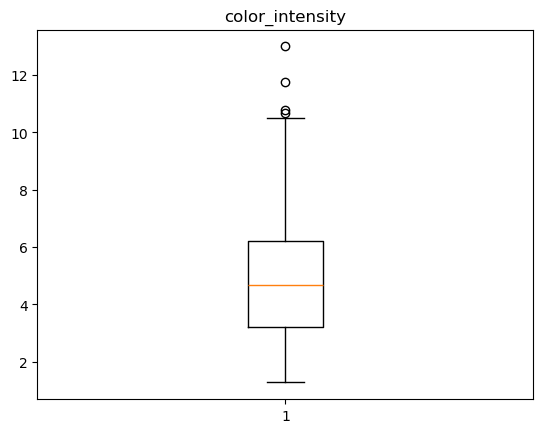

In [18]:
# 사분위 값으로부터 IQR * whis 많큼의 범위를 벗어나면 이상치
plt.boxplot(wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()

In [19]:
import numpy as np
def outliers_iqr(dt, col):
    quartile_1, quartile_3 = np.percentile(dt[col], [25, 75])
    iqr = quartile_3 - quartile_1
    whis = 1.5
    min_border = quartile_1 - (iqr * whis)
    max_border = quartile_3 + (iqr * whis)
    outliers = dt[(dt[col] > max_border) | (dt[col] < min_border)]
    return outliers[[col]]

outliers = outliers_iqr(wine, 'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


In [20]:
# print(type(wine))
# print(type(outliers))
dt = wine
col = 'color_intensity'
quartile_1, quartile_3 = np.percentile(dt[col], [25, 75])
iqr = quartile_3 - quartile_1
whis = 1.5
min_border = quartile_1 - (iqr * whis)
max_border = quartile_3 + (iqr * whis)
# outliers = dt[(dt[col] > max_border) | (dt[col] < min_border)]


# print(type((dt[col] > max_border) | (dt[col] < min_border)))
# outliers

In [21]:
drop_outliers = wine.drop(index=outliers.index)

print('orignal: ', wine.shape)
print('drop outlier: ', drop_outliers.shape)

orignal:  (178, 14)
drop outlier:  (174, 14)


In [22]:
# 이상치를 NaN으로 변경하여 이후 결측치 처리 로직에 함께 처리되도록 함
wine.loc[outliers.index, 'color_intensity'] = np.nan

# 결측치 처리 예시- 평균값으로 대체
# 교재에선 inplace가 빠진 오류가 있음 추후 Pandas에선 inplace 역시 변할 예정
wine['color_intensity']
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index, 'color_intensity']


151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64